In [7]:
import os
os.chdir("../")


In [8]:
from scripts.load_data import load_df
df = load_df()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Melt the DataFrame to have a single 'application' column and separate 'DL' and 'UL' volumes
melted_df = pd.melt(df, 
                    id_vars=[], 
                    value_vars=['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                                'Google DL (Bytes)', 'Google UL (Bytes)',
                                'Email DL (Bytes)', 'Email UL (Bytes)',
                                'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                                'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                                'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                                'Other DL (Bytes)', 'Other UL (Bytes)'],
                    var_name='application_type', 
                    value_name='data_volume')

# Split 'application_type' into 'application' and 'type' (DL/UL)
# Adjust this logic to ensure it correctly splits application and type.
melted_df['application'] = melted_df['application_type'].apply(lambda x: ' '.join(x.split(' ')[:-2]))
melted_df['type'] = melted_df['application_type'].apply(lambda x: x.split(' ')[-2])

# Pivot to get the correct format for aggregation
pivot_df = melted_df.pivot_table(index='application', columns='type', values='data_volume', aggfunc='sum').reset_index()

# Inspect the columns to check the structure
print(pivot_df.columns)

# Rename the columns based on the actual structure
# This should now correctly map the columns
pivot_df.columns = ['application', 'Total DL (Bytes)', 'Total UL (Bytes)']

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(pivot_df['application'], pivot_df['Total DL (Bytes)'], label='Download')
plt.bar(pivot_df['application'], pivot_df['Total UL (Bytes)'], label='Upload', bottom=pivot_df['Total DL (Bytes)'])
plt.xlabel('Application')
plt.ylabel('Data Volume (Bytes)')
plt.title('Total Data Volume per Application')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
aggregated_data = df.groupby('application').agg({'Total DL (Bytes)': 'sum', 'Total UL (Bytes)': 'sum'}).reset_index()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(aggregated_data['application'], aggregated_data['Total DL (Bytes)'], label='Download')
plt.bar(aggregated_data['application'], aggregated_data['Total UL (Bytes)'], label='Upload', bottom=aggregated_data['Total DL (Bytes)'])
plt.xlabel('Application')
plt.ylabel('Data Volume (Bytes)')
plt.title('Total Data Volume per Application')
plt.legend()
plt.show()

In [ ]:
from scripts.preprocessing import count_missing_values, replace_missing_with_mean, count_outliers, replace_outliers_with_percentile

mv = count_missing_values(df)
columns = ['Dur. (ms)', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)']


missing =  count_outliers(df, columns)
print(missing)

df = replace_missing_with_mean(df, columns)

df=replace_outliers_with_percentile(df,columns)


In [ ]:

import pandas as pd
from scripts.eda_module import (
    load_and_inspect_data,
    handle_missing_and_outliers,
    segment_users_by_duration,
    compute_basic_metrics,
    univariate_analysis,
    bivariate_analysis,
    correlation_analysis,
    pca_analysis,
    aggregate_user_data  
)

# Call the aggregation function
user_aggregates = aggregate_user_data(df)

# Preview the result
print(user_aggregates.head())


In [ ]:
missing =  count_outliers(df, columns)
print(missing)


In [ ]:
import pandas as pd
from scripts.eda_module import (
    load_and_inspect_data,
    segment_users_by_duration,
    compute_basic_metrics,
    univariate_analysis,
    bivariate_analysis,
    correlation_analysis,
    pca_analysis,
    aggregate_user_data
)




# Inspect data
load_and_inspect_data(df)


# Call the aggregation function
user_aggregates = aggregate_user_data(df)

# Preview the result
print(user_aggregates.head())

# Segment users by session duration decile class
df, decile_data = segment_users_by_duration(df)
print(decile_data)

plt.figure(figsize=(10, 6))
decile_data.plot(kind='bar', color='skyblue')
plt.xlabel('Decile Class')
plt.ylabel('Total Data (Bytes)')
plt.title('Total Data Volume per Decile Class Based on Session Duration')
plt.xticks(rotation=0)
plt.show()

# Compute basic metrics
mean_values, median_values, std_dev, dispersion_params = compute_basic_metrics(df)
print(mean_values, median_values, std_dev, dispersion_params)

# Perform univariate analysis
univariate_analysis(df, 'Total_Session_Duration')

# Bivariate analysis between application data and total data
app_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
               'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
bivariate_analysis(df, app_columns)

#Correlation analysis
correlation_matrix = correlation_analysis(df, app_columns)

# Perform PCA for dimensionality reduction
pca_result = pca_analysis(df, app_columns)


In [ ]:
import pandas as pd
from scripts.user_engagement import (
    aggregate_engagement_metrics,
    normalize_and_cluster,
    compute_cluster_stats,
    aggregate_traffic_per_app,
    plot_top_3_apps,
    elbow_method,
    silhouette_analysis
)


# Aggregate engagement metrics
user_metrics = aggregate_engagement_metrics(df)
print(user_metrics.head())

# Normalize and apply k-means clustering
user_metrics, kmeans = normalize_and_cluster(user_metrics, k=3)
print(user_metrics.head())

# Compute cluster stats
cluster_stats = compute_cluster_stats(user_metrics)
print(cluster_stats)
 
# Aggregate total traffic per application
app_traffic = aggregate_traffic_per_app(df)
print(app_traffic)

# Plot top 3 most used applications
plot_top_3_apps(app_traffic)

# Use elbow method to find optimal k
inertia = elbow_method(user_metrics)

# Evaluate silhouette score for k=3
silhouette_score_k3 = silhouette_analysis(user_metrics, k=3)
print(f"Silhouette Score for k=3: {silhouette_score_k3}")


In [12]:
df = df.dropna(subset=['MSISDN/Number'])

In [13]:
numeric_cols = [
        'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
        'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
        'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
    ]

In [ ]:
from scripts.experiance_segmentation import aggregate_per_customer
result_df = aggregate_per_customer(df)
print(result_df)

In [ ]:
from scripts.experiance_segmentation import compute_top_bottom_frequent_main
results = compute_top_bottom_frequent_main(df)

for col, stats in results.items():
    print(f"Column: {col}")
    print("Top Values:\n", stats['Top Values'])
    print("Bottom Values:\n", stats['Bottom Values'])
    print("Most Frequent Values:\n", stats['Most Frequent Values'])
    print("\n")



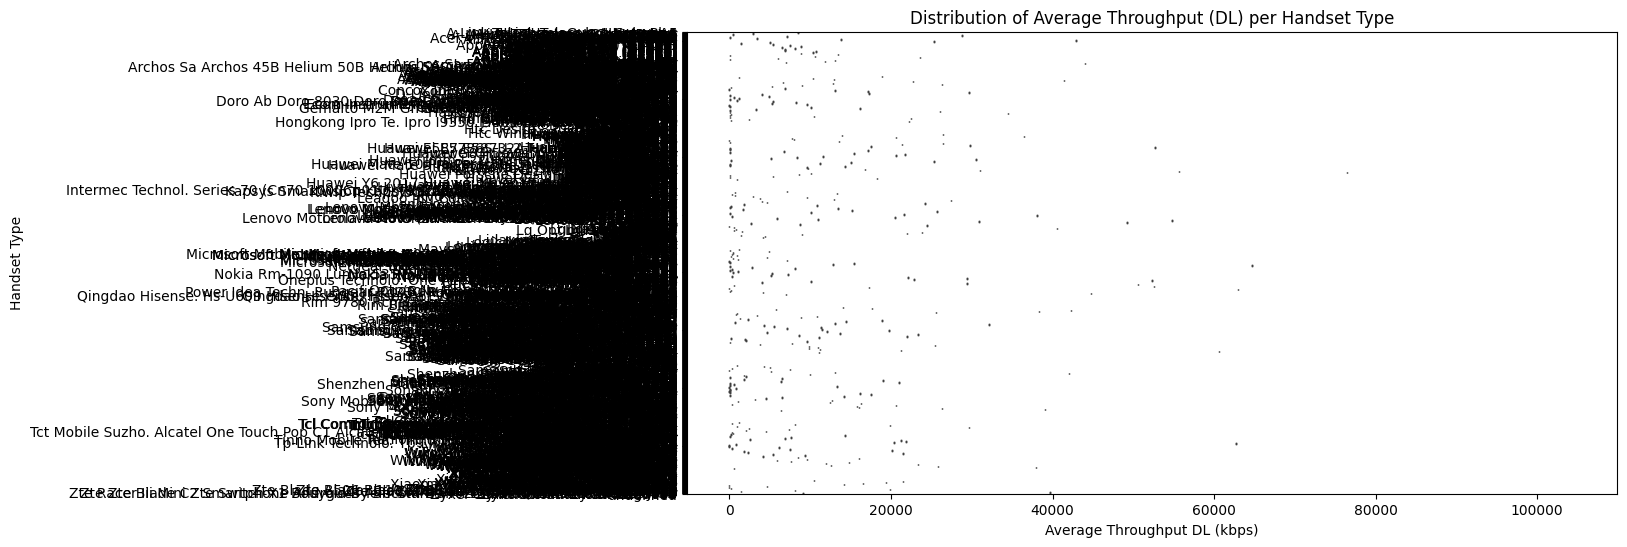

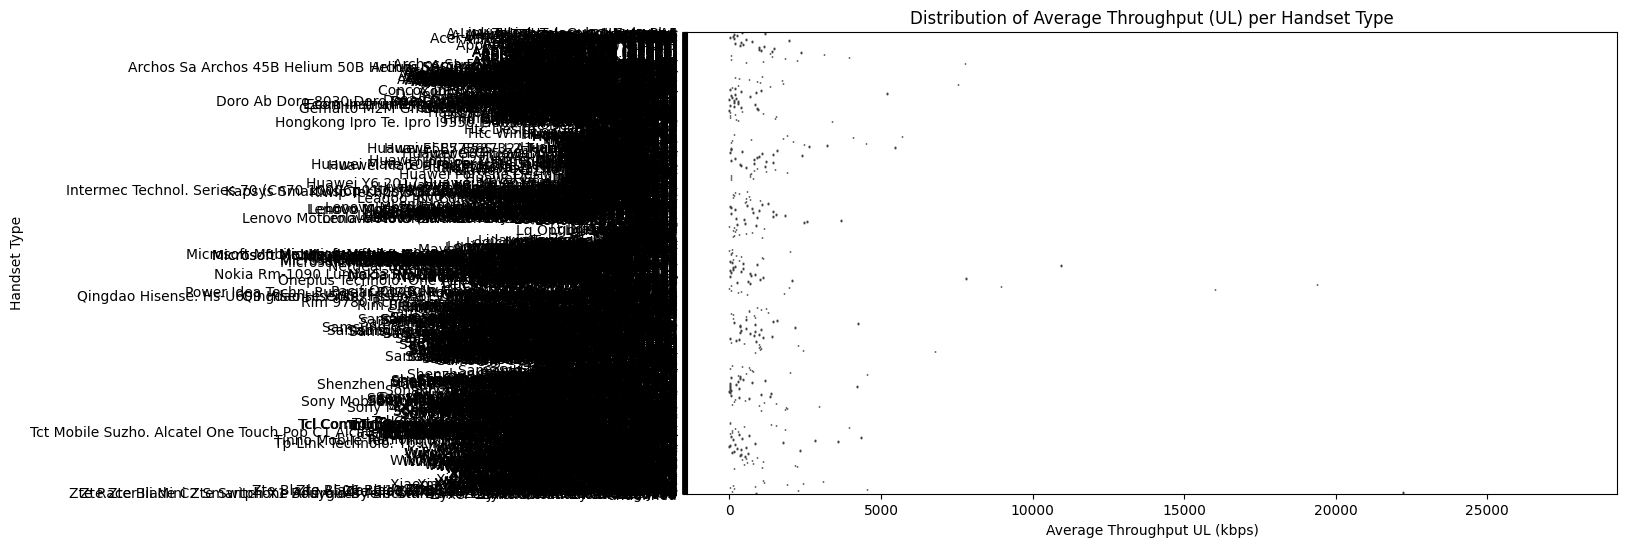

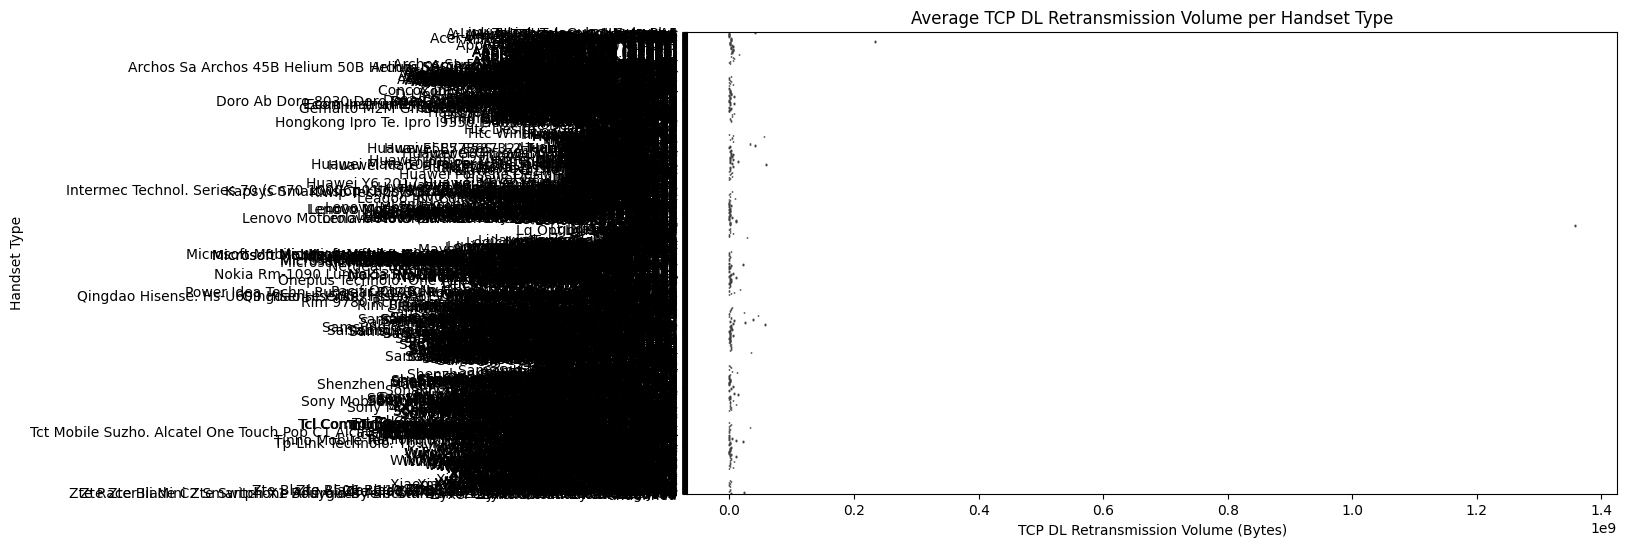

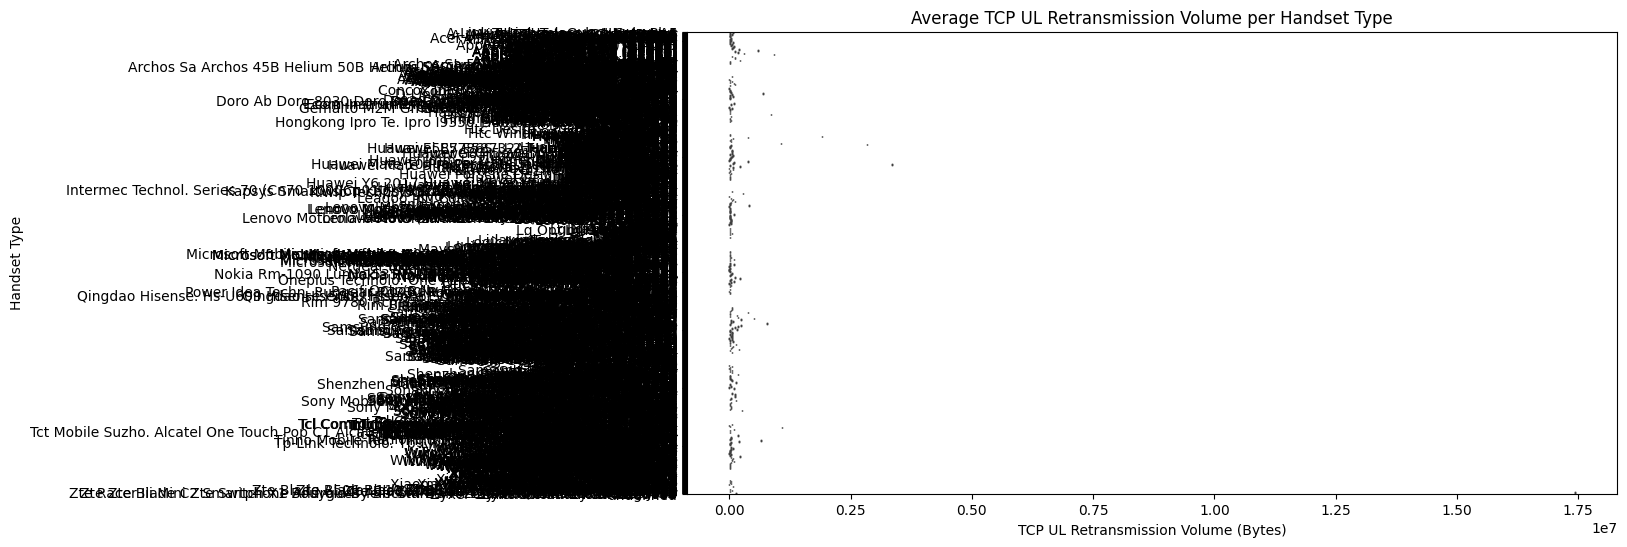

In [20]:
from scripts.experiance_segmentation import analyze_throughput_tcp_retransmission
handset_stats = analyze_throughput_tcp_retransmission(df)


In [22]:
from scripts.experiance_segmentation import perform_kmeans_clustering
cluster_descriptions, cluster_counts = perform_kmeans_clustering(df)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:
from scripts.customer_satisfaction_analysis import assign_engagement_experience_scores
engagement_metrics = ['Metric1', 'Metric2', 'Metric3']  # Replace with actual engagement metrics
experience_metrics = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                      'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']  # Replace with actual experience metrics
scores_df = assign_engagement_experience_scores(df, engagement_metrics, experience_metrics)

print(scores_df)


KeyError: "None of [Index(['Metric1', 'Metric2', 'Metric3'], dtype='object')] are in the [columns]"

In [ ]:
from scripts.customer_satisfaction_analysis import compute_satisfaction_score
top_satisfied_customers = compute_satisfaction_score(df)

print(top_satisfied_customers)


In [ ]:
from scripts.customer_satisfaction_analysis import build_regression_model
features = ['Engagement Score', 'Experience Score']  
target = 'Satisfaction Score'
model, mse, r2 = build_regression_model(df, features, target)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
from scripts.customer_satisfaction_analysis import compute_satisfaction_score
top_satisfied_customers = compute_satisfaction_score(df)

print(top_satisfied_customers)

In [ ]:

features = ['Engagement Score', 'Experience Score'] 
target = 'Satisfaction Score'
model, mse, r2 = build_regression_model(df, features, target)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
from scripts.customer_satisfaction_analysis import run_kmeans_on_scores
df, kmeans = run_kmeans_on_scores(df) 

In [ ]:
from scripts.customer_satisfaction_analysis import aggregate_scores_per_cluster
cluster_aggregation = aggregate_scores_per_cluster(df)
print(cluster_aggregation)

In [ ]:
from scripts.customer_satisfaction_analysis import export_to_mysql
export_message = export_to_mysql(df, 'user_scores', 'your_user', 'your_password', 'localhost', 'your_database')
print(export_message)
